In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px

from imblearn.over_sampling import KMeansSMOTE, SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import permutation_test_score, StratifiedShuffleSplit

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, RFE, RFECV
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import (cross_validate, StratifiedKFold, train_test_split,GridSearchCV,
                                    HalvingGridSearchCV)

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings    
warnings.filterwarnings("ignore")

print("Project has been created with this version of Pandas: " ,pd. __version__," And with this version of Numpy: ",np. __version__)

Project has been created with this version of Pandas:  2.2.2  And with this version of Numpy:  1.26.4


## Importing Dataset

In [2]:
data = pd.read_csv('../datasets/processed/heart_with_nans.csv')
df_original = pd.DataFrame(data)
df_original

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,No,Yes,No,...,"White only, Non-Hispanic",Age 80 or older,1.60,78.02,30.47,No,No,No,No,No
1,Alabama,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,Yes,Yes,No,...,"White only, Non-Hispanic",Age 80 or older,1.45,59.87,28.56,No,No,Yes,Yes,No
2,Alabama,Female,Fair,6.0,2.0,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,"Black only, Non-Hispanic",Age 80 or older,1.63,58.97,22.31,No,No,Yes,Yes,No
3,Alabama,Female,Very good,2.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,No,No,No,...,"White only, Non-Hispanic",Age 75 to 79,1.68,77.11,27.44,No,Yes,Yes,Yes,No
4,Alabama,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,No,Yes,No,...,"White only, Non-Hispanic",Age 75 to 79,1.73,77.11,25.85,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433318,Virgin Islands,Male,Good,12.0,30.0,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,"Black only, Non-Hispanic",Age 65 to 69,1.93,108.86,29.21,Yes,Yes,No,No,Yes
433319,Virgin Islands,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,No,No,No,...,"Black only, Non-Hispanic",Age 30 to 34,1.65,68.04,24.96,No,Yes,No,No,No
433320,Virgin Islands,Female,Very good,10.0,0.0,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,...,Hispanic,Age 50 to 54,1.68,96.62,34.38,Yes,Yes,Yes,No,No
433321,Virgin Islands,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,"Black only, Non-Hispanic",Age 65 to 69,1.63,63.05,23.86,No,No,No,No,No


## Overview of Dataset

In [3]:
df_original.describe(include='all')

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
count,433323,433323,432061,422538.000000,425215.000000,424795,432072,378239,431404,430755,...,423753,425544,411182.000000,399172.000000,392788.000000,403383,382987,402005,370440,399229
unique,52,2,5,NaN,NaN,4,2,2,4,2,...,5,13,NaN,NaN,NaN,2,2,2,2,2
top,Washington,Female,Good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,No,No,No,...,"White only, Non-Hispanic",Age 65 to 69,NaN,NaN,NaN,Yes,No,No,No,Yes
freq,26444,229541,144209,NaN,NaN,348057,325227,219333,247855,407304,...,313067,46099,NaN,NaN,NaN,212617,249505,204711,208403,201248
mean,NaN,NaN,NaN,4.482591,4.358383,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.702533,82.886462,28.479288,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.827409,8.320868,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.107442,21.338946,6.541975,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.910000,22.680000,12.020000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.630000,68.040000,24.100000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.700000,80.290000,27.400000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,5.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.780000,94.350000,31.620000,NaN,NaN,NaN,NaN,NaN


In [4]:
df_original.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
HighCholesterol               object
HighBloodPressure             object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
R

In [5]:
df_original.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1262
PhysicalHealthDays           10785
MentalHealthDays              8108
LastCheckupTime               8528
PhysicalActivities            1251
HighCholesterol              55084
HighBloodPressure             1919
HadHeartAttack                2568
HadAngina                     4231
HadStroke                     1474
HadAsthma                     1701
HadSkinCancer                 2930
HadCOPD                       2066
HadDepressiveDisorder         2587
HadKidneyDisease              1892
HadArthritis                  2560
HadDiabetes                    984
DeafOrHardOfHearing          14792
BlindOrVisionDifficulty      15710
DifficultyConcentrating      18128
DifficultyWalking            17850
DifficultyDressingBathing    17676
DifficultyErrands            19400
SmokerStatus                 23062
ECigaretteUsage              23251
RaceEthnicityCategory         9570
AgeCategory         

In [6]:
df_original.isnull().sum()/len(df_original)*100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.291238
PhysicalHealthDays            2.488906
MentalHealthDays              1.871122
LastCheckupTime               1.968047
PhysicalActivities            0.288699
HighCholesterol              12.711995
HighBloodPressure             0.442857
HadHeartAttack                0.592630
HadAngina                     0.976408
HadStroke                     0.340162
HadAsthma                     0.392548
HadSkinCancer                 0.676170
HadCOPD                       0.476781
HadDepressiveDisorder         0.597014
HadKidneyDisease              0.436626
HadArthritis                  0.590783
HadDiabetes                   0.227082
DeafOrHardOfHearing           3.413620
BlindOrVisionDifficulty       3.625471
DifficultyConcentrating       4.183484
DifficultyWalking             4.119329
DifficultyDressingBathing     4.079174
DifficultyErrands             4.477030
SmokerStatus             

In [7]:
df_original.shape

(433323, 37)

In [8]:
df_original.nunique()

State                          52
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
HighCholesterol                 2
HighBloodPressure               4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
RaceEthnicityCategory           5
AgeCategory                    13
HeightInMeters

In [9]:
df_original.duplicated().sum()

400

In [10]:
df_original['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       46099
Age 70 to 74       43533
Age 60 to 64       41974
Age 80 or older    38869
Age 75 to 79       34543
Age 55 to 59       34219
Age 50 to 54       31291
Age 40 to 44       28463
Age 35 to 39       27153
Age 45 to 49       27070
Age 18 to 24       26280
Age 30 to 34       24803
Age 25 to 29       21247
Name: count, dtype: int64

In [11]:
df_original.select_dtypes(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,HadAngina,HadStroke,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,Within past 2 years (1 year but less than 2 ye...,No,No,Yes,No,No,No,...,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,No
1,Alabama,Female,Very good,Within past 2 years (1 year but less than 2 ye...,Yes,Yes,Yes,No,No,No,...,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,No,No,Yes,Yes,No
2,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,No,No,...,No,Former smoker,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 80 or older,No,No,Yes,Yes,No
3,Alabama,Female,Very good,Within past 5 years (2 years but less than 5 y...,Yes,No,No,No,No,No,...,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 75 to 79,No,Yes,Yes,Yes,No
4,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,Yes,No,Yes,No,No,No,...,Yes,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 75 to 79,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433318,Virgin Islands,Male,Good,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,No,NaN,...,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 65 to 69,Yes,Yes,No,No,Yes
433319,Virgin Islands,Female,Very good,Within past year (anytime less than 12 months ...,No,No,No,No,No,No,...,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 30 to 34,No,Yes,No,No,No
433320,Virgin Islands,Female,Very good,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Hispanic,Age 50 to 54,Yes,Yes,Yes,No,No
433321,Virgin Islands,Female,Good,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,No,No,...,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 65 to 69,No,No,No,No,No


In [12]:
df_original.describe(include='number')

,PhysicalHealthDays,MentalHealthDays,HeightInMeters,WeightInKilograms,BMI
count,422538.000000,425215.000000,411182.000000,399172.000000,392788.000000
mean,4.482591,4.358383,1.702533,82.886462,28.479288
std,8.827409,8.320868,0.107442,21.338946,6.541975
min,0.000000,0.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,1.630000,68.040000,24.100000
50%,0.000000,0.000000,1.700000,80.290000,27.400000
75%,4.000000,5.000000,1.780000,94.350000,31.620000
max,30.000000,30.000000,2.410000,284.000000,99.840000


In [13]:
df_original.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,HadAngina,HadStroke,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
count,433323,433323,432061,424795,432072,378239,431404,430755,429092,431849,...,413923,410261,410072,423753,425544,403383,382987,402005,370440,399229
unique,52,2,5,4,2,2,4,2,2,2,...,2,4,4,5,13,2,2,2,2,2
top,Washington,Female,Good,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,No,...,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No,No,Yes
freq,26444,229541,144209,348057,325227,219333,247855,407304,405638,413499,...,381959,251981,318696,313067,46099,212617,249505,204711,208403,201248


## Handling Missing Value

In [14]:
df = df_original.copy()

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [16]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [17]:
df[categorical_cols] = df[categorical_cols].astype(str)

In [18]:
# Imputasi untuk kolom numerik menggunakan SimpleImputer (menggunakan median)
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

In [19]:
df.to_csv('../datasets/imputed/heart_df_simpleImputer.csv', index=False)

In [20]:
# Imputasi untuk kolom numerik menggunakan KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

In [21]:
df.to_csv('../datasets/imputed/heart_df_KNNImputer.csv', index=False)

In [22]:
# Imputasi untuk kolom numerik menggunakan IterativeImputer (MICE)
mice_imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
df[numerical_cols] = mice_imputer.fit_transform(df[numerical_cols])


In [23]:
df.to_csv('../datasets/imputed/heart_df_MICE.csv', index=False)

In [24]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
HighCholesterol              0
HighBloodPressure            0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholD

## Drop Duplicates

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

## Encoding

In [27]:
label_encoder = LabelEncoder()

label_columns = ['Sex', 'HighBloodPressure', 'LastCheckupTime', 'HadDiabetes', 'CovidPos']

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [28]:
df = pd.get_dummies(df, columns=['RaceEthnicityCategory'], drop_first=True)

In [29]:
ordinal_mapping = {
    'GeneralHealth': { "Excellent": 5, "Very good": 4, "Good": 3, "Fair": 2, "Poor": 1 },
    'SmokerStatus': { "Current smoker - now smokes every day": 4, 
                     "Current smoker - now smokes some days": 3,
                     "Former smoker": 2,
                     "Never smoked": 1 },
    'ECigaretteUsage': { "Never used e-cigarettes in my entire life": 1,
                         "Use them every day": 4,
                         "Use them some days": 3,
                         "Not at all (right now)": 2 },
    'AgeCategory': { "Age 18 to 24": 1, "Age 25 to 29": 2, "Age 30 to 34": 3, 
                    "Age 35 to 39": 4, "Age 40 to 44": 5, "Age 45 to 49": 6, 
                    "Age 50 to 54": 7, "Age 55 to 59": 8, "Age 60 to 64": 9, 
                    "Age 65 to 69": 10, "Age 70 to 74": 11, "Age 75 to 79": 12, 
                    "Age 80 or older": 13 }
}

for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping)

In [30]:
df.replace({'No': 0, 'Yes': 1}, inplace=True)

In [31]:
state_encoding = df.groupby('State')['HadHeartAttack'].mean().to_dict()
df['State'] = df['State'].map(state_encoding)

In [32]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic"
0,0.065423,0,4,0.0,0.0,1,0,0,2,0,...,30.47,0,0,0,0,0,False,False,False,True
1,0.065423,0,4,0.0,0.0,1,1,1,2,0,...,28.56,0,0,1,1,0,False,False,False,True
2,0.065423,0,2,6.0,2.0,3,1,1,2,0,...,22.31,0,0,1,1,0,False,False,False,False
3,0.065423,0,4,2.0,0.0,2,1,0,0,0,...,27.44,0,1,1,1,0,False,False,False,True
4,0.065423,0,2,0.0,0.0,3,1,0,2,0,...,25.85,1,0,0,1,0,False,False,False,True


## Modeling

In [33]:
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# model Logistic Regression tanpa SMOTE
logreg_no_smote = LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000, random_state=42)
logreg_no_smote.fit(X_train_scaled, y_train)

y_pred_no_smote = logreg_no_smote.predict(X_test_scaled)
y_pred_proba_no_smote = logreg_no_smote.predict_proba(X_test_scaled)

# metrik evaluasi
fpr_no_smote, tpr_no_smote, _ = metrics.roc_curve(y_test, y_pred_proba_no_smote[:, 1])
auc_no_smote = round(metrics.auc(fpr_no_smote, tpr_no_smote), 5)

# hasil evaluasi ke dalam DataFrame
no_smote_eval = pd.DataFrame(data=[ 
    accuracy_score(y_test, y_pred_no_smote),
    precision_score(y_test, y_pred_no_smote, average='binary'),
    recall_score(y_test, y_pred_no_smote, average='binary'),
    f1_score(y_test, y_pred_no_smote, average='binary'),
    auc_no_smote
], index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], columns=["Logistic_Regression_No_SMOTE"])

no_smote_eval

,Logistic_Regression_No_SMOTE
Accuracy,0.945912
Precision,0.503788
Recall,0.282939
F1-score,0.362365
AUC,0.873790



Confusion Matrix for Logistic Regression (No SMOTE):
[[120790   1965]
 [  5056   1995]]

Accuracy of Logistic Regression (No SMOTE): 94.59%

Classification Report for Logistic Regression (No SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    122755
           1       0.50      0.28      0.36      7051

    accuracy                           0.95    129806
   macro avg       0.73      0.63      0.67    129806
weighted avg       0.94      0.95      0.94    129806



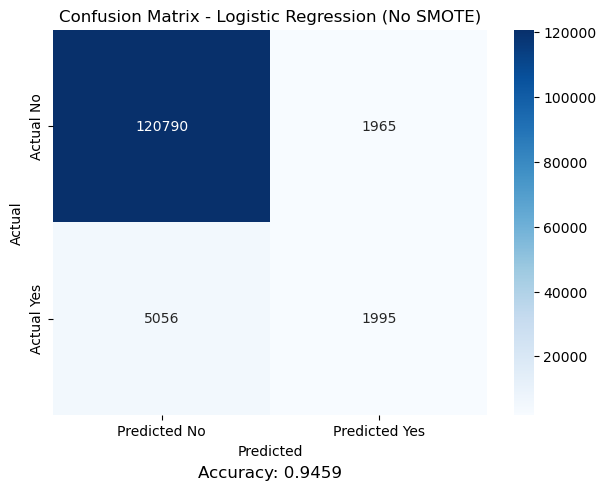

In [37]:
# Menghitung accuracy dan confusion matrix
conf_matrix_log_k = confusion_matrix(y_test, y_pred_no_smote)
logreg_acc_score_no_smote = accuracy_score(y_test, y_pred_no_smote)

print("\nConfusion Matrix for Logistic Regression (No SMOTE):")
print(conf_matrix_log_k)

# Menampilkan accuracy
print("\nAccuracy of Logistic Regression (No SMOTE): {:.2f}%".format(logreg_acc_score_no_smote * 100))

# Menampilkan classification report
print("\nClassification Report for Logistic Regression (No SMOTE):")
print(classification_report(y_test, y_pred_no_smote))

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_log_k, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Logistic Regression (No SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menambahkan accuracy pada heatmap
plt.text(0.5, -0.15, f'Accuracy: {logreg_acc_score_no_smote:.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()

<Figure size 1000x600 with 0 Axes>

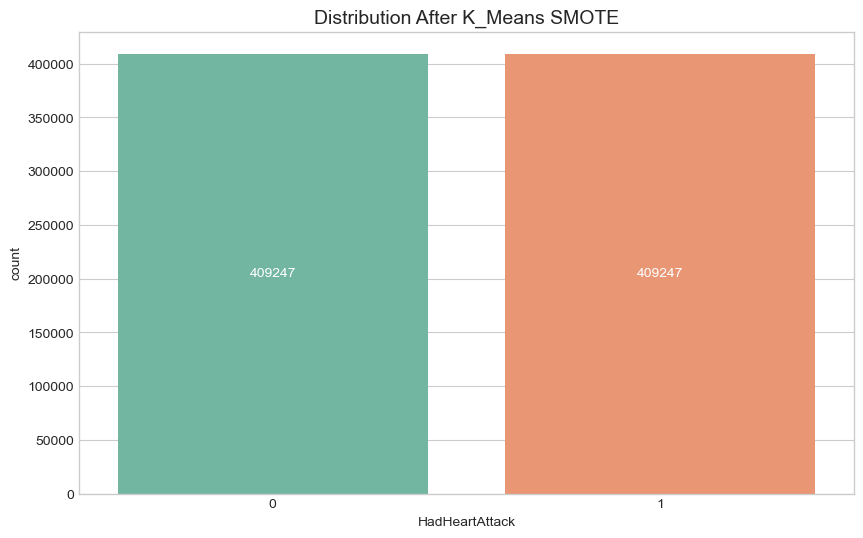

In [38]:
# Set background color
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,6))
plt.gcf().set_facecolor("#F0FFF0")

# Apply KMeansSMOTE untuk menangani ketidakseimbangan kelas
KSMOTE = KMeansSMOTE(cluster_balance_threshold=0.1)
X_KSMOTE, y_KSMOTE = KSMOTE.fit_resample(X, y)

# Visualisasi distribusi data setelah KMeans SMOTE
plt.figure(figsize=(10,6))
ax = sns.countplot(x=y_KSMOTE, palette='Set2')
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Distribution After K_Means SMOTE", size=14)
plt.show()

In [39]:
# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_KSMOTE, y_KSMOTE, test_size=0.35, random_state=0)

# Menstandarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model Logistic Regression dengan parameter yang telah ditentukan
logreg_k = LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000, random_state=42)
logreg_k.fit(X_train_scaled, y_train)

# Prediksi dan probabilitas
y_pred_log_k = logreg_k.predict(X_test_scaled)
y_pred_proba_log_k = logreg_k.predict_proba(X_test_scaled)

# Menghitung metrik evaluasi
fpr_log_k, tpr_log_k, _ = metrics.roc_curve(y_test, y_pred_proba_log_k[:, 1])
auc_log_k = round(metrics.auc(fpr_log_k, tpr_log_k), 5)

# Menyusun hasil evaluasi ke dalam DataFrame
KSMOTE_log_eval = pd.DataFrame(data=[
    accuracy_score(y_test, y_pred_log_k),
    precision_score(y_test, y_pred_log_k, average='binary'),
    recall_score(y_test, y_pred_log_k, average='binary'),
    f1_score(y_test, y_pred_log_k, average='binary'),
    auc_log_k
], index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], columns=["Logistic_Regression_KSMOTE"])

# Menampilkan hasil evaluasi
KSMOTE_log_eval

,Logistic_Regression_KSMOTE
Accuracy,0.930985
Precision,0.919523
Recall,0.944588
F1-score,0.931887
AUC,0.975200



Confusion Matrix for Logistic Regression:
[[131454  11837]
 [  7934 135248]]

Accuracy of Logistic Regression: 93.10%

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93    143291
           1       0.92      0.94      0.93    143182

    accuracy                           0.93    286473
   macro avg       0.93      0.93      0.93    286473
weighted avg       0.93      0.93      0.93    286473



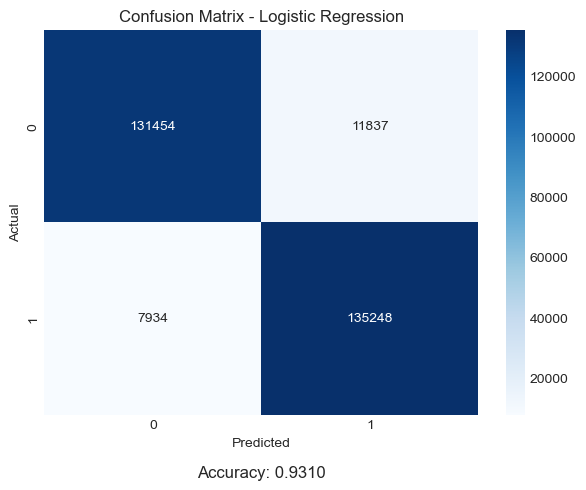

In [40]:
# Menghitung accuracy dan confusion matrix
logreg_acc_score = accuracy_score(y_test, y_pred_log_k)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_log_k)

# Menampilkan hasil confusion matrix
print("\nConfusion Matrix for Logistic Regression:")
print(logreg_conf_matrix)

# Menampilkan accuracy
print("\nAccuracy of Logistic Regression: {:.2f}%".format(logreg_acc_score * 100))

# Menampilkan classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_k))

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menambahkan accuracy pada heatmap
plt.text(0.5, -0.15, f'Accuracy: {logreg_acc_score:.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()